In [2]:
import numpy as np

import sys
sys.path.append('..')

import nibabel as nib
from matplotlib import pyplot as plt
from nilearn.image import new_img_like

from fetal_net.augment import augment_data

In [3]:
from matplotlib import pyplot as plt

In [4]:
def slice_it(arr, inds):
    return arr[inds[0][0]:inds[0][1], inds[1][0]: inds[1][1], inds[2][0]:inds[2][1]]

In [5]:
vol = nib.load('../../Datasets/fetus_window_1_99v3/150/volume.nii.gz')
mask = nib.load('../../Datasets/fetus_window_1_99v3/150/truth.nii.gz')
vol.shape

(256, 256, 71)

In [6]:
def z_norm(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std
vol = new_img_like(vol, z_norm(vol.get_fdata()))

<OrthoSlicer3D: (256, 256, 71)>

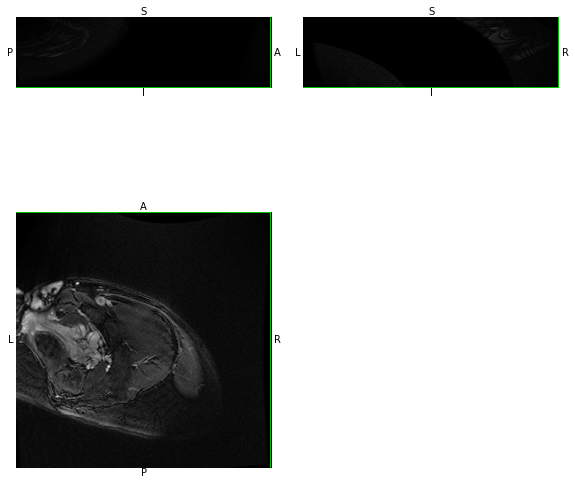

In [6]:
vol.orthoview()

In [7]:
vol.get_fdata().min(), vol.get_fdata().max(), len(np.unique(vol.get_data()))

(-0.7323698448331252, 4.385784447398155, 1041)

In [7]:
patch_corner = [75, 75, 22]
patch_shape = [128, 128, 5]
data_range = [(start, start + size) for start, size in zip(patch_corner, patch_shape)]
data_range

[(75, 203), (75, 203), (22, 27)]

In [8]:
truth_index = 1
truth_size = 2
truth_range = data_range[:2] + [(patch_corner[2] + truth_index,
                                patch_corner[2] + truth_index + truth_size)]
truth_range

[(75, 203), (75, 203), (23, 25)]

# Gaussian Filter

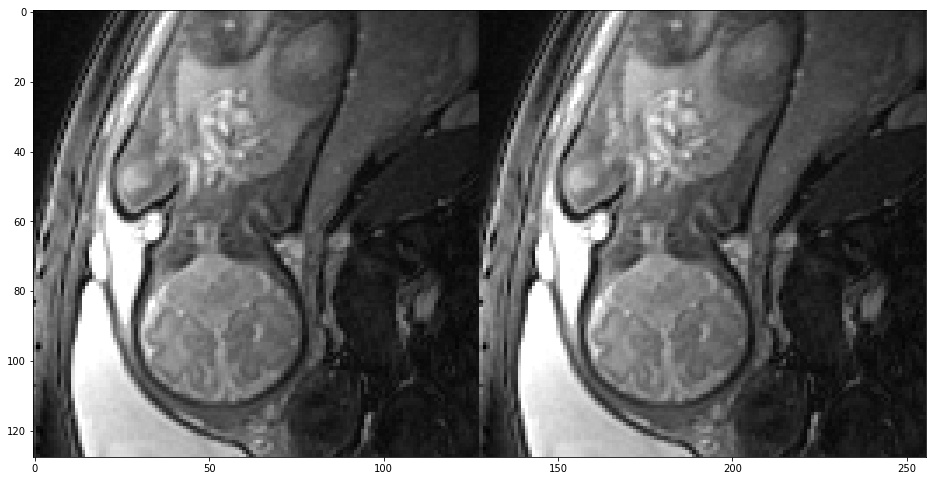

In [41]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           gaussian_filter={
                                'max_sigma': 1.5,
                                'prob': 1,
                            })
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

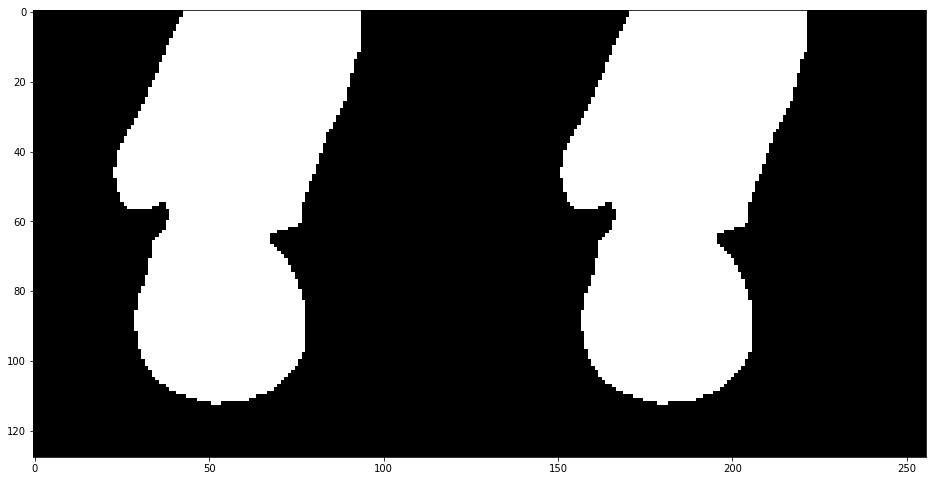

In [42]:
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

# Shot Noise

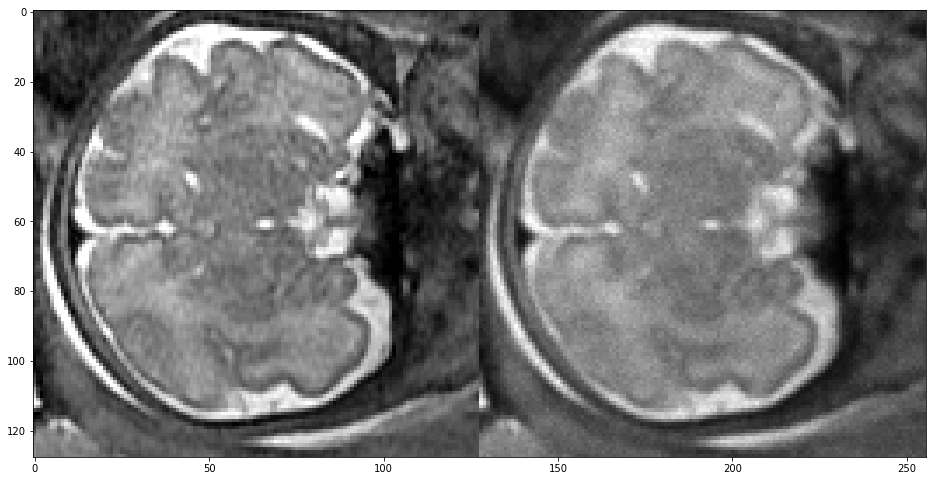

In [34]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                                gaussian_filter={
                                'max_sigma': 1,
                                'prob': 1,
                            }, poisson_noise=1)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

# contrast deviation

-1.6407582998084675 2.8147932589534737


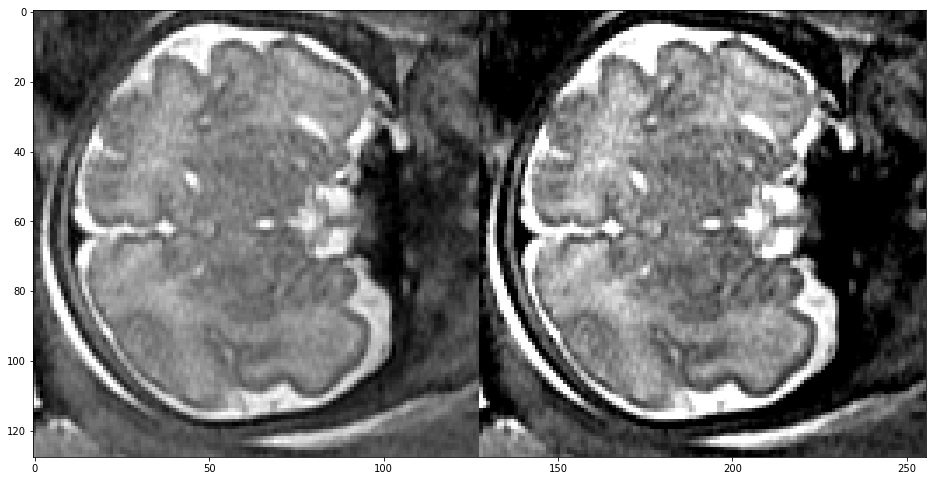

In [36]:
data = vol.get_fdata()
truth = mask.get_fdata()
print(data.min(), data.max())
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           contrast_deviation={'min_factor': 0.2, 'max_factor': 0.2})
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

# intensity_multiplication_range

In [9]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           intensity_multiplication_range=[0.8, 1.2])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

ValueError: too many values to unpack (expected 3)

# piecewise_affine

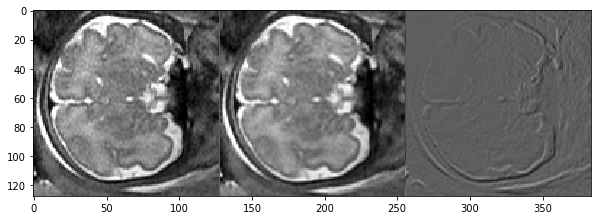

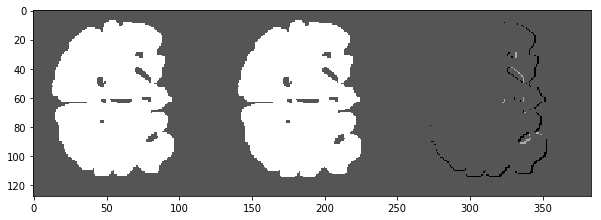

In [41]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           piecewise_affine={'scale': 0.1})
plt.figure(figsize = (10,16))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2], (slice_it(data, data_range)[..., 2] - data2[..., 2])/2.0], cmap='gray')

plt.figure(figsize = (10,16))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0], (slice_it(truth, truth_range)[..., 0]- truth2[..., 0])/2.0], cmap='gray')

# Coarse Dropout

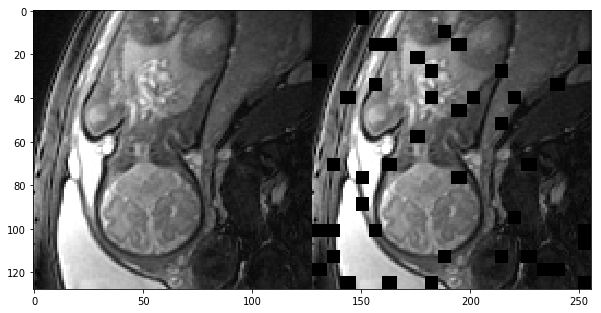

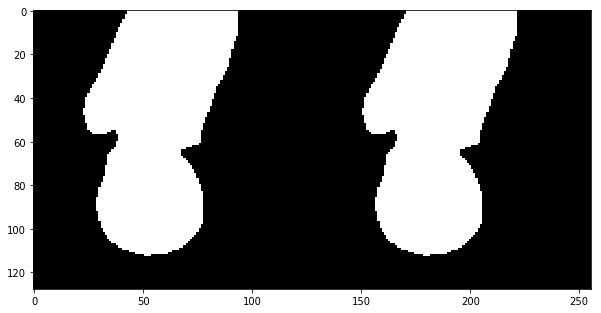

In [26]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           coarse_dropout={'rate': 0.1, 'size_percent': [0.15, 0.25], 'per_channel': False})
plt.figure(figsize = (10,16))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

plt.figure(figsize = (10,16))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

# elastic_transform

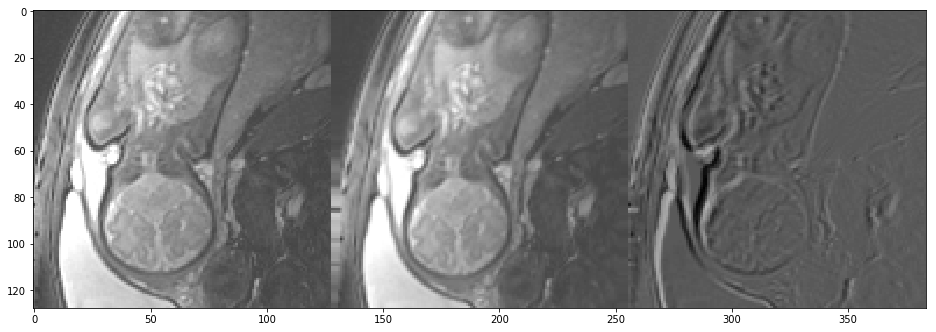

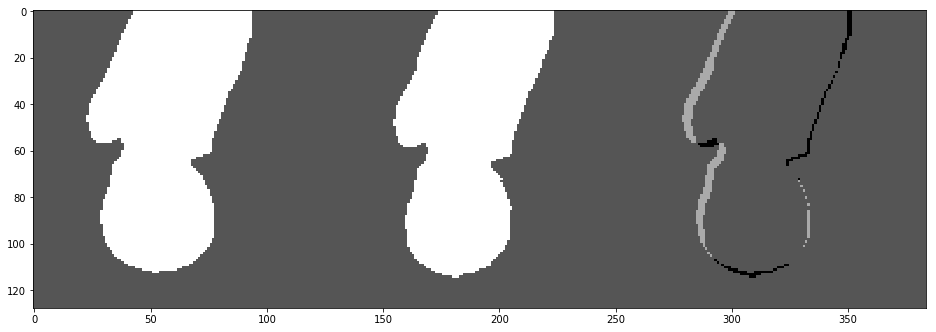

In [69]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           elastic_transform={'alpha': 1250, 'sigma': 50})
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2], (slice_it(data, data_range)[..., 2] - data2[..., 2])/2], cmap='gray')

plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0], (slice_it(truth, truth_range)[..., 0]- truth2[..., 0])/2.0], cmap='gray')

# scale_deviation

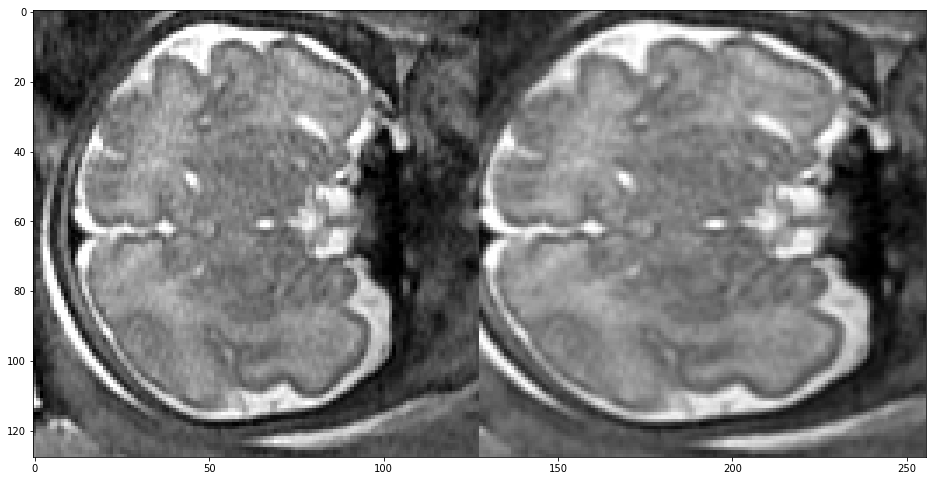

In [77]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _,_ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           scale_deviation=[0.15, 0.15, 0.0])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

# iso scale_deviation

In [ ]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                           iso_scale_deviation={
                               "max": 1.2
                           }, scale_deviation=[0.1, 0.1, 0.0])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

# rotate

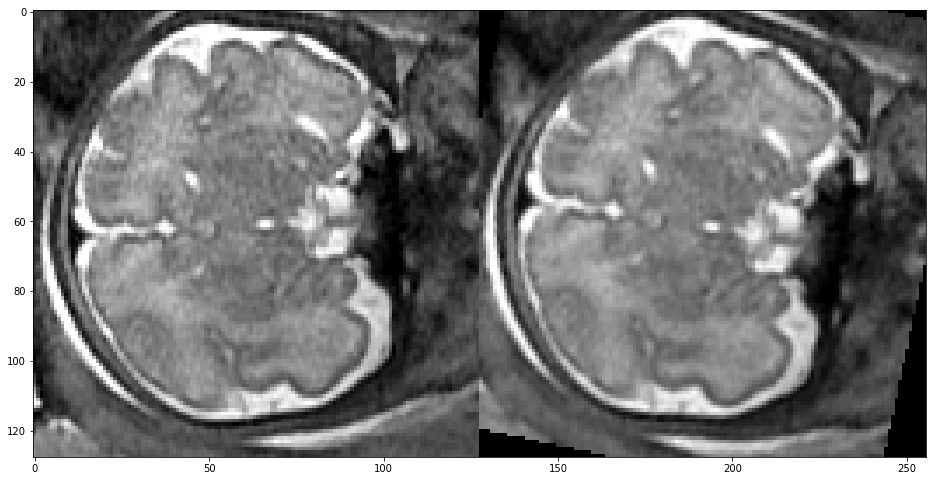

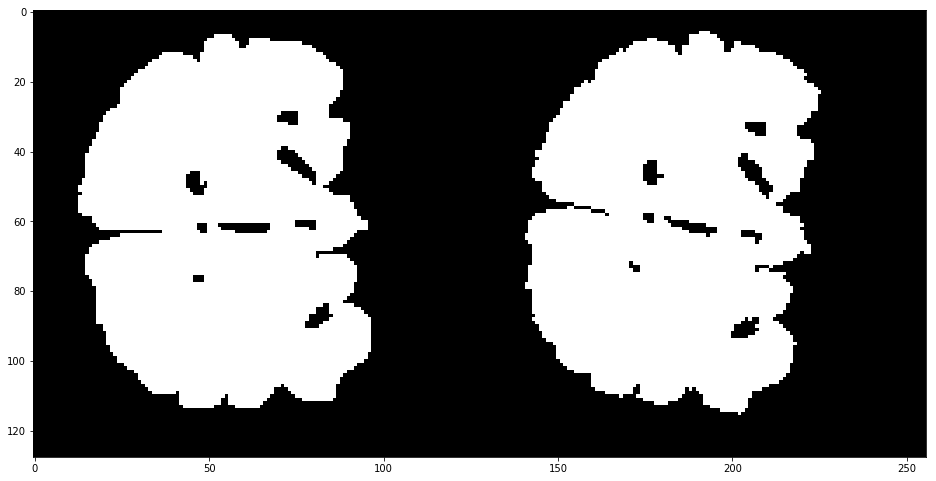

In [79]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                                rotate_deviation=[0, 0, 45])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

#print(slice_it(truth, truth_range).shape)
#print(truth2.shape)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

# Flip

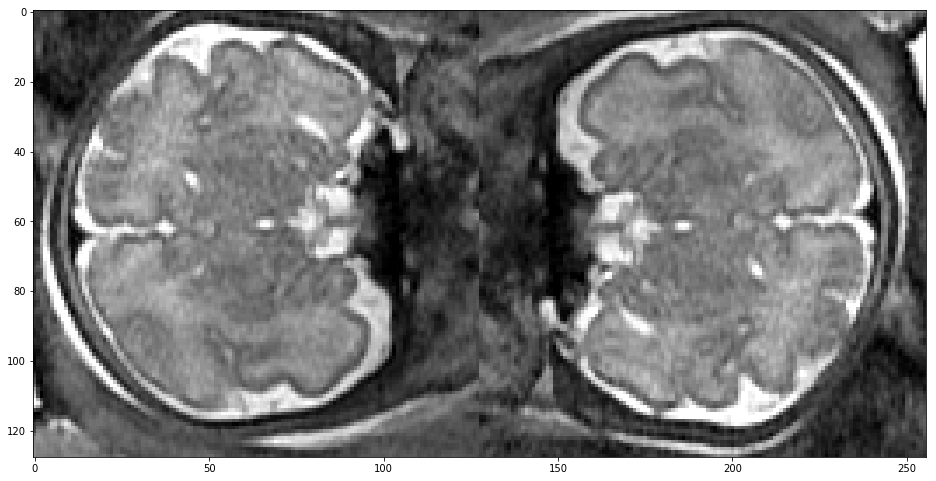

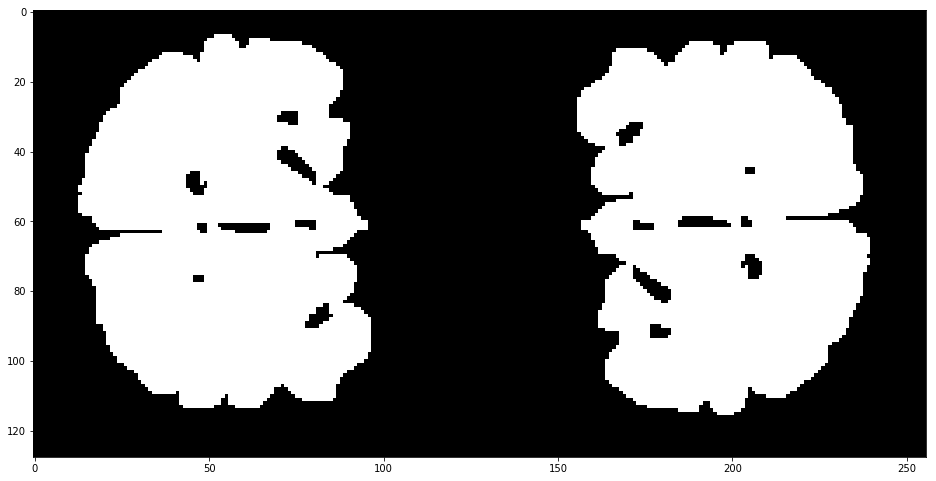

In [81]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _,_ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                                flip=[0, 0, 1])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

#print(slice_it(truth, truth_range).shape)
#print(truth2.shape)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

# Translate

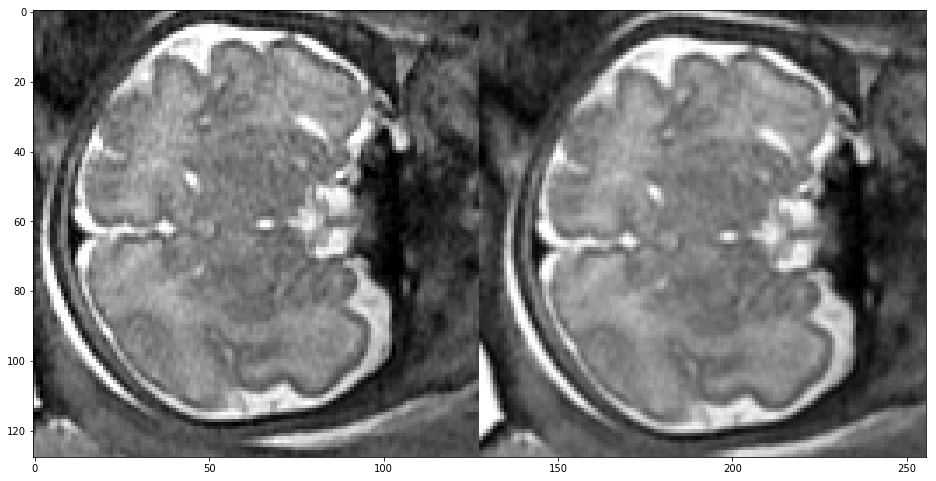

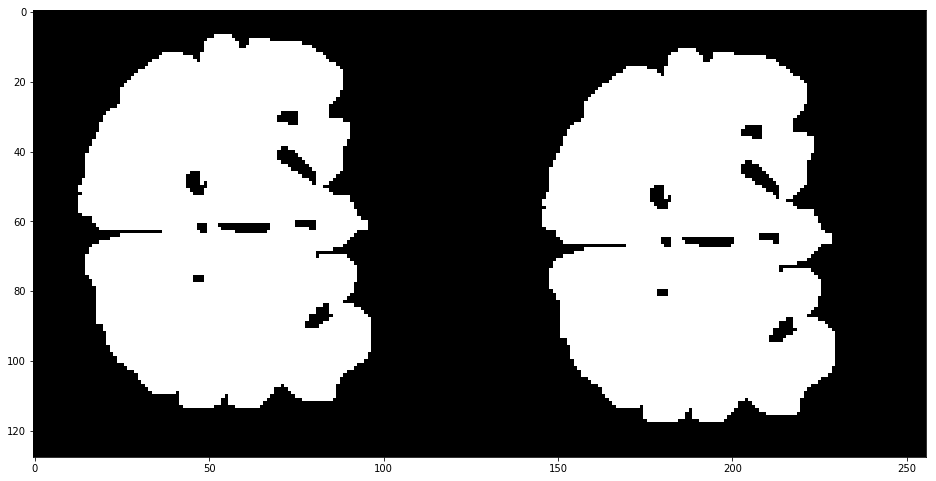

In [82]:
data = vol.get_fdata()
truth = mask.get_fdata()
data2, truth2, _, _ = augment_data(data, truth, data.min(), data.max(), data_range=data_range, truth_range=truth_range,
                                translate_deviation=[10, 10, 0])
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range)[..., 2], data2[..., 2]], cmap='gray')

#print(slice_it(truth, truth_range).shape)
#print(truth2.shape)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range)[..., 0], truth2[..., 0]], cmap='gray')

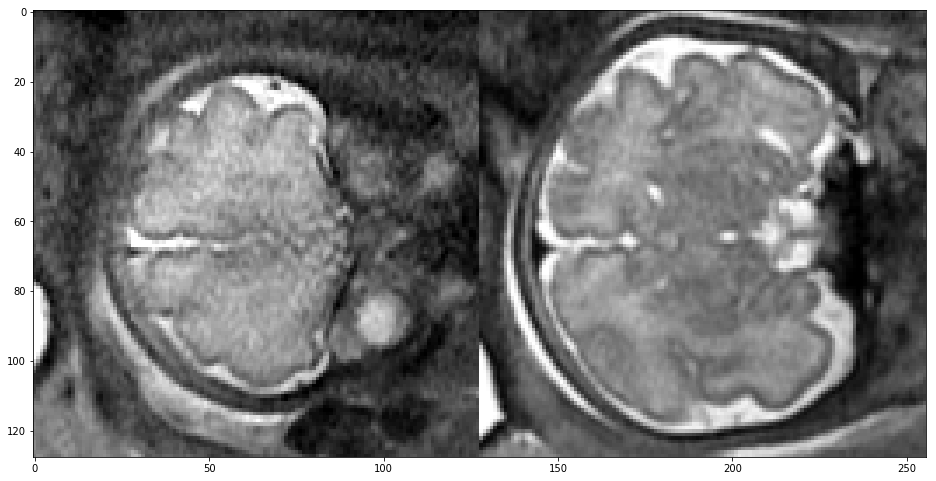

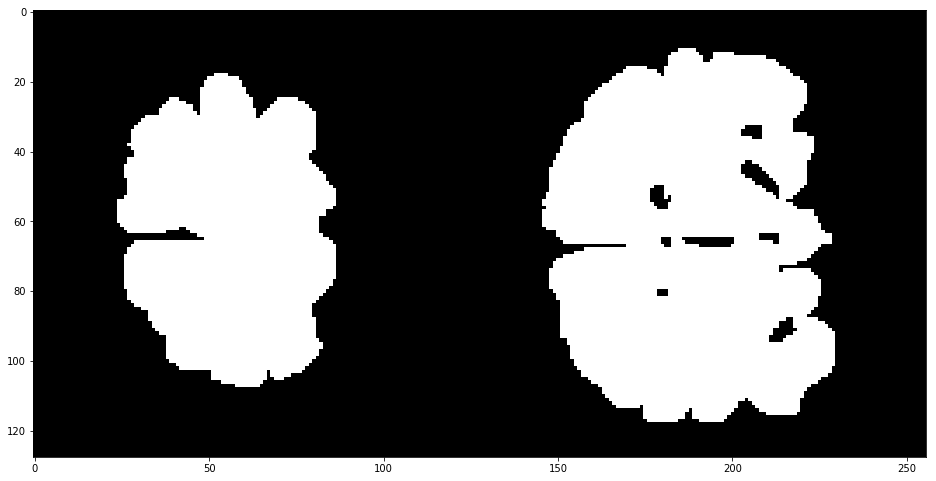

In [83]:
z_trans = 9

data_range2 = data_range.copy()
data_range2[-1] = np.add(data_range2[-1], z_trans)

plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(data, data_range2)[..., 2], data2[..., 2]], cmap='gray')

truth_range2 = truth_range
truth_range2[-1] = np.add(truth_range2[-1], z_trans)
plt.figure(figsize = (16,14))
plt.imshow(np.c_[slice_it(truth, truth_range2)[..., 0], truth2[..., 0]], cmap='gray')